<a href="https://colab.research.google.com/github/koushikroy/facial_sentiment_analysis/blob/main/02_sentiment_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Dateset Loading and Preprocessing

## Downloading Dataset

In [5]:
!wget https://raw.githubusercontent.com/koushikroy/facial_sentiment_analysis/main/dataset/imp_fea_dataset_20.csv

--2021-07-08 17:12:26--  https://raw.githubusercontent.com/koushikroy/facial_sentiment_analysis/main/dataset/imp_fea_dataset_20.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148719 (145K) [text/plain]
Saving to: ‘imp_fea_dataset_20.csv’

imp_fea_dataset_20. 100%[===================>] 145.23K  --.-KB/s    in 0.003s  

2021-07-08 17:12:26 (51.0 MB/s) - ‘imp_fea_dataset_20.csv’ saved [148719/148719]



## Exploring and Cleaning 

In [6]:
sentiment_data_original = pd.read_csv('/content/imp_fea_dataset_20.csv')

In [9]:
sentiment_data_original.tail(10)

,Unnamed: 0,11y,339y,110y,17y,18y,68y,16y,67y,298y,316y,86y,315y,106y,297y,85y,317y,87y,15y,108y,66y,output
377,377,0.057580,0.055737,0.065687,0.801167,0.818832,0.083737,0.780952,0.183740,0.065642,0.793096,0.795049,0.809582,0.186704,0.165832,0.811745,0.772483,0.774350,0.762443,0.188844,0.207339,7
378,378,0.040592,0.040692,0.047109,0.654993,0.672020,0.065316,0.641142,0.202215,0.053557,0.651571,0.652379,0.669638,0.200389,0.192254,0.670740,0.638445,0.639278,0.631217,0.208053,0.230943,7
379,379,0.047037,0.053698,0.046003,0.770048,0.788251,0.056144,0.750620,0.156649,0.070998,0.764836,0.761400,0.782575,0.152988,0.173056,0.779074,0.745185,0.742156,0.733062,0.169833,0.182511,7
380,380,0.038742,0.039927,0.044908,0.779642,0.797376,0.062250,0.760387,0.160638,0.053302,0.772826,0.772665,0.788991,0.163712,0.152644,0.788701,0.752912,0.753125,0.742578,0.166608,0.185035,7
381,381,0.053937,0.054906,0.059472,0.694596,0.713002,0.075700,0.676611,0.181332,0.067848,0.689126,0.689278,0.706888,0.182350,0.175700,0.707152,0.671113,0.671233,0.661777,0.186636,0.204843,7
382,382,0.042583,0.045035,0.047134,0.728669,0.748919,0.062893,0.707321,0.178650,0.058560,0.721632,0.724311,0.740879,0.176057,0.173938,0.743858,0.699588,0.702000,0.688762,0.186769,0.203422,7
383,383,0.098089,0.100955,0.099325,0.832645,0.848669,0.109465,0.813827,0.206665,0.113173,0.823182,0.825677,0.837476,0.205407,0.215514,0.840209,0.804069,0.806298,0.795116,0.216277,0.229719,7
384,384,0.030021,0.038381,0.029579,0.775125,0.792937,0.042556,0.756839,0.139110,0.059267,0.768600,0.766205,0.784894,0.141035,0.154036,0.782447,0.749900,0.747969,0.740024,0.148157,0.164470,7
385,385,0.029790,0.032586,0.032786,0.803435,0.821342,0.046595,0.783120,0.149567,0.046569,0.795293,0.795607,0.811954,0.149780,0.150114,0.812003,0.774113,0.774908,0.763476,0.158602,0.175099,7
386,386,0.028294,0.031425,0.032584,0.798233,0.814960,0.048443,0.779954,0.166443,0.046820,0.788627,0.790966,0.803303,0.162677,0.169883,0.805924,0.769750,0.772434,0.762304,0.176322,0.190824,7



**From the dataset, we can see that:**
*   There are in total 21 Columns excluding the index column 
*   The first 21 columns represents the most important landmark points in the face and the 'output' column represnts the emotion
*   The face has been cropped and resized thus no need for further normalization



In [10]:
sentiment_data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  387 non-null    int64  
 1   11y         387 non-null    float64
 2   339y        387 non-null    float64
 3   110y        387 non-null    float64
 4   17y         387 non-null    float64
 5   18y         387 non-null    float64
 6   68y         387 non-null    float64
 7   16y         387 non-null    float64
 8   67y         387 non-null    float64
 9   298y        387 non-null    float64
 10  316y        387 non-null    float64
 11  86y         387 non-null    float64
 12  315y        387 non-null    float64
 13  106y        387 non-null    float64
 14  297y        387 non-null    float64
 15  85y         387 non-null    float64
 16  317y        387 non-null    float64
 17  87y         387 non-null    float64
 18  15y         387 non-null    float64
 19  108y        387 non-null    f

In [11]:
#value_count in the output column 
sentiment_data_original['output'].value_counts()

7    83
4    69
5    60
2    59
0    45
6    28
3    25
1    18
Name: output, dtype: int64



> So you can see that the neutral category has a staggering number of input compared to othet categories. This can be a later as the model might be overflitted. So, we need to take care of this.



In [12]:
sentiment_data_small_version = sentiment_data_original
sentiment_data_small_version

,Unnamed: 0,11y,339y,110y,17y,18y,68y,16y,67y,298y,316y,86y,315y,106y,297y,85y,317y,87y,15y,108y,66y,output
0,0,0.087810,0.086514,0.093708,0.701211,0.716253,0.108578,0.686886,0.234690,0.095875,0.696938,0.699335,0.712851,0.234497,0.225658,0.715577,0.683342,0.685688,0.675410,0.238876,0.260274,0
1,1,0.098683,0.098165,0.104281,0.664070,0.679439,0.119037,0.650274,0.250426,0.107617,0.660159,0.663162,0.676266,0.250525,0.238674,0.679406,0.647318,0.649850,0.639768,0.252469,0.275065,0
2,2,0.085394,0.084500,0.091048,0.660387,0.674604,0.105700,0.647303,0.229239,0.093703,0.656849,0.658943,0.672119,0.230414,0.219152,0.674397,0.644289,0.646311,0.637065,0.231457,0.253444,0
3,3,0.075667,0.071821,0.084392,0.665309,0.682307,0.101926,0.649277,0.217908,0.078597,0.659706,0.664673,0.677375,0.219089,0.198675,0.682582,0.644042,0.648405,0.636364,0.220197,0.242033,0
4,4,0.113934,0.112442,0.119322,0.645588,0.660449,0.132435,0.632069,0.263147,0.119717,0.641322,0.643500,0.656761,0.258085,0.251820,0.659018,0.628381,0.630256,0.621487,0.269695,0.286610,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,382,0.042583,0.045035,0.047134,0.728669,0.748919,0.062893,0.707321,0.178650,0.058560,0.721632,0.724311,0.740879,0.176057,0.173938,0.743858,0.699588,0.702000,0.688762,0.186769,0.203422,7
383,383,0.098089,0.100955,0.099325,0.832645,0.848669,0.109465,0.813827,0.206665,0.113173,0.823182,0.825677,0.837476,0.205407,0.215514,0.840209,0.804069,0.806298,0.795116,0.216277,0.229719,7
384,384,0.030021,0.038381,0.029579,0.775125,0.792937,0.042556,0.756839,0.139110,0.059267,0.768600,0.766205,0.784894,0.141035,0.154036,0.782447,0.749900,0.747969,0.740024,0.148157,0.164470,7
385,385,0.029790,0.032586,0.032786,0.803435,0.821342,0.046595,0.783120,0.149567,0.046569,0.795293,0.795607,0.811954,0.149780,0.150114,0.812003,0.774113,0.774908,0.763476,0.158602,0.175099,7


In [13]:
sentiment_data_small_version['output'].value_counts()

7    83
4    69
5    60
2    59
0    45
6    28
3    25
1    18
Name: output, dtype: int64

## Mapping The Output Column

In [15]:
# mapping already done .. 
# the CSV comes with mapped data
input_df_copy = sentiment_data_small_version

## Train Test Split

In [16]:
X = input_df_copy.drop("output", axis=1)
X = X.drop("Unnamed: 0", axis=1)
X

,11y,339y,110y,17y,18y,68y,16y,67y,298y,316y,86y,315y,106y,297y,85y,317y,87y,15y,108y,66y
0,0.087810,0.086514,0.093708,0.701211,0.716253,0.108578,0.686886,0.234690,0.095875,0.696938,0.699335,0.712851,0.234497,0.225658,0.715577,0.683342,0.685688,0.675410,0.238876,0.260274
1,0.098683,0.098165,0.104281,0.664070,0.679439,0.119037,0.650274,0.250426,0.107617,0.660159,0.663162,0.676266,0.250525,0.238674,0.679406,0.647318,0.649850,0.639768,0.252469,0.275065
2,0.085394,0.084500,0.091048,0.660387,0.674604,0.105700,0.647303,0.229239,0.093703,0.656849,0.658943,0.672119,0.230414,0.219152,0.674397,0.644289,0.646311,0.637065,0.231457,0.253444
3,0.075667,0.071821,0.084392,0.665309,0.682307,0.101926,0.649277,0.217908,0.078597,0.659706,0.664673,0.677375,0.219089,0.198675,0.682582,0.644042,0.648405,0.636364,0.220197,0.242033
4,0.113934,0.112442,0.119322,0.645588,0.660449,0.132435,0.632069,0.263147,0.119717,0.641322,0.643500,0.656761,0.258085,0.251820,0.659018,0.628381,0.630256,0.621487,0.269695,0.286610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,0.042583,0.045035,0.047134,0.728669,0.748919,0.062893,0.707321,0.178650,0.058560,0.721632,0.724311,0.740879,0.176057,0.173938,0.743858,0.699588,0.702000,0.688762,0.186769,0.203422
383,0.098089,0.100955,0.099325,0.832645,0.848669,0.109465,0.813827,0.206665,0.113173,0.823182,0.825677,0.837476,0.205407,0.215514,0.840209,0.804069,0.806298,0.795116,0.216277,0.229719
384,0.030021,0.038381,0.029579,0.775125,0.792937,0.042556,0.756839,0.139110,0.059267,0.768600,0.766205,0.784894,0.141035,0.154036,0.782447,0.749900,0.747969,0.740024,0.148157,0.164470
385,0.029790,0.032586,0.032786,0.803435,0.821342,0.046595,0.783120,0.149567,0.046569,0.795293,0.795607,0.811954,0.149780,0.150114,0.812003,0.774113,0.774908,0.763476,0.158602,0.175099


In [17]:
# Create X & y

y = input_df_copy["output"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Declaration and Training

## Model 1

### Declaration

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(256, activation='relu'),    
    layers.Dropout(.2),
    layers.Dense(128, activation='relu'),    
    layers.Dropout(.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(8, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = .0003),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=250,
    min_delta=0.0001,
    restore_best_weights=True,
)

### Training

In [19]:
history_1 = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=2000,
    callbacks=[early_stopping],
    verbose=1, 
)

Epoch 1/2000
10/10 [==============================] - 3s 22ms/step - loss: 2.0666 - accuracy: 0.1133 - val_loss: 2.0307 - val_accuracy: 0.2179
Epoch 2/2000
10/10 [==============================] - 0s 4ms/step - loss: 2.0084 - accuracy: 0.2039 - val_loss: 2.0173 - val_accuracy: 0.2179
Epoch 3/2000
10/10 [==============================] - 0s 4ms/step - loss: 1.9816 - accuracy: 0.2168 - val_loss: 2.0180 - val_accuracy: 0.2179
Epoch 4/2000
10/10 [==============================] - 0s 4ms/step - loss: 1.9657 - accuracy: 0.2136 - val_loss: 2.0209 - val_accuracy: 0.2179
Epoch 5/2000
10/10 [==============================] - 0s 4ms/step - loss: 1.9458 - accuracy: 0.2201 - val_loss: 2.0211 - val_accuracy: 0.2179
Epoch 6/2000
10/10 [==============================] - 0s 4ms/step - loss: 1.9516 - accuracy: 0.2233 - val_loss: 2.0055 - val_accuracy: 0.2179
Epoch 7/2000
10/10 [==============================] - 0s 4ms/step - loss: 1.9632 - accuracy: 0.2104 - val_loss: 1.9952 - val_accuracy: 0.2179
Epoch

### Evaluation and Graphs

In [20]:
# Evaluate our model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

3/3 [==============================] - 0s 3ms/step - loss: 1.2915 - accuracy: 0.6026
Model loss on the test set: 1.2914601564407349
Model accuracy on the test set: 60.26%


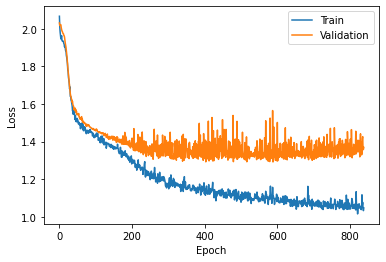

In [21]:
# summarize history for loss
plt.plot(history_1.history['loss'])#[5:])
plt.plot(history_1.history['val_loss'])#[5:])
#plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

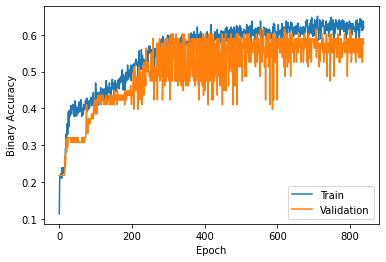

In [22]:
# summarize history for accuracy
plt.plot(history_1.history['accuracy'])#[5:])
plt.plot(history_1.history['val_accuracy'])#[5:])
#plt.title('model loss')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

## Model 2

### Declaration

In [23]:
from tensorflow import keras
from tensorflow.keras import layers

model_2 = keras.Sequential([
    layers.Dense(512, activation='relu'),    
    layers.Dropout(.2),
    layers.Dense(256, activation='relu'),    
    layers.Dropout(.2),
    layers.Dense(128, activation='relu'),    
    layers.Dropout(.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(8, activation='softmax')
])

model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = .0003),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=250,
    min_delta=0.0001,
    restore_best_weights=True,
)

### Training

In [24]:
history_2 = model_2.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=2000,
    callbacks=[early_stopping],
    verbose=1, 
)

Epoch 1/2000
10/10 [==============================] - 1s 21ms/step - loss: 2.0511 - accuracy: 0.1942 - val_loss: 2.0468 - val_accuracy: 0.2179
Epoch 2/2000
10/10 [==============================] - 0s 4ms/step - loss: 2.0132 - accuracy: 0.2104 - val_loss: 2.0305 - val_accuracy: 0.2179
Epoch 3/2000
10/10 [==============================] - 0s 4ms/step - loss: 1.9872 - accuracy: 0.2039 - val_loss: 2.0317 - val_accuracy: 0.2179
Epoch 4/2000
10/10 [==============================] - 0s 5ms/step - loss: 1.9723 - accuracy: 0.2201 - val_loss: 2.0295 - val_accuracy: 0.2179
Epoch 5/2000
10/10 [==============================] - 0s 4ms/step - loss: 1.9807 - accuracy: 0.2233 - val_loss: 2.0179 - val_accuracy: 0.2179
Epoch 6/2000
10/10 [==============================] - 0s 4ms/step - loss: 1.9568 - accuracy: 0.2104 - val_loss: 2.0078 - val_accuracy: 0.2179
Epoch 7/2000
10/10 [==============================] - 0s 4ms/step - loss: 1.9556 - accuracy: 0.2233 - val_loss: 2.0038 - val_accuracy: 0.2179
Epoch

### Evaluation and Graphs

In [25]:
# Evaluate our model on the test set
loss, accuracy = model_2.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

3/3 [==============================] - 0s 4ms/step - loss: 1.2364 - accuracy: 0.5769
Model loss on the test set: 1.2364115715026855
Model accuracy on the test set: 57.69%


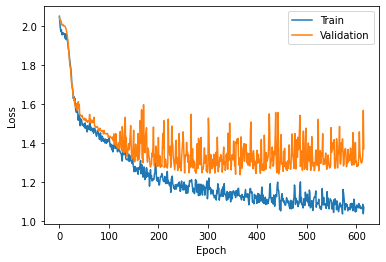

In [26]:
# summarize history for loss
plt.plot(history_2.history['loss'])#[5:])
plt.plot(history_2.history['val_loss'])#[5:])
#plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

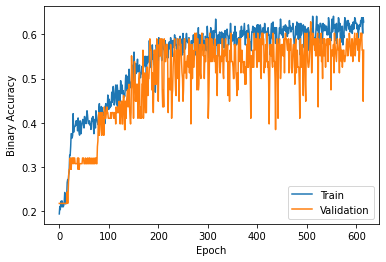

In [27]:
# summarize history for accuracy
plt.plot(history_2.history['accuracy'])#[5:])
plt.plot(history_2.history['val_accuracy'])#[5:])
#plt.title('model loss')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

## Model 3

### Declaration

In [42]:
from tensorflow import keras
from tensorflow.keras import layers

model_3 = keras.Sequential([
    layers.Dense(64, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(8, activation='softmax')
])

model_3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = .0003),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=250,
    min_delta=0.0001,
    restore_best_weights=True,
)

### Training

In [43]:
history_3 = model_3.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=2000,
    callbacks=[early_stopping],
    verbose=1, 
)

Epoch 1/2000
10/10 [==============================] - 0s 19ms/step - loss: 2.0610 - accuracy: 0.2460 - val_loss: 2.0386 - val_accuracy: 0.3077
Epoch 2/2000
10/10 [==============================] - 0s 4ms/step - loss: 2.0254 - accuracy: 0.2524 - val_loss: 2.0257 - val_accuracy: 0.2179
Epoch 3/2000
10/10 [==============================] - 0s 4ms/step - loss: 2.0019 - accuracy: 0.2201 - val_loss: 2.0170 - val_accuracy: 0.2179
Epoch 4/2000
10/10 [==============================] - 0s 4ms/step - loss: 1.9867 - accuracy: 0.2298 - val_loss: 2.0144 - val_accuracy: 0.2179
Epoch 5/2000
10/10 [==============================] - 0s 4ms/step - loss: 1.9717 - accuracy: 0.2136 - val_loss: 2.0116 - val_accuracy: 0.2179
Epoch 6/2000
10/10 [==============================] - 0s 4ms/step - loss: 1.9615 - accuracy: 0.2168 - val_loss: 2.0073 - val_accuracy: 0.2179
Epoch 7/2000
10/10 [==============================] - 0s 4ms/step - loss: 1.9536 - accuracy: 0.2136 - val_loss: 2.0066 - val_accuracy: 0.2179
Epoch

### Evaluation and Graphs

In [44]:
# Evaluate our model on the test set
loss, accuracy = model_3.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

3/3 [==============================] - 0s 5ms/step - loss: 1.3036 - accuracy: 0.5897
Model loss on the test set: 1.3035871982574463
Model accuracy on the test set: 58.97%


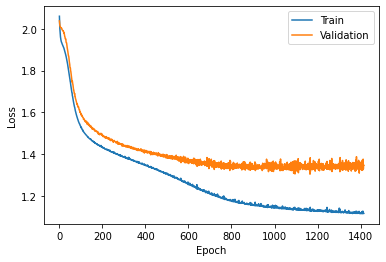

In [45]:
# summarize history for loss
plt.plot(history_3.history['loss'])#[5:])
plt.plot(history_3.history['val_loss'])#[5:])
#plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

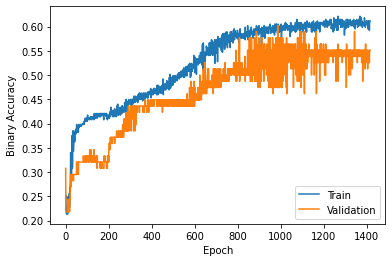

In [46]:
# summarize history for accuracy
plt.plot(history_3.history['accuracy'])#[5:])
plt.plot(history_3.history['val_accuracy'])#[5:])
#plt.title('model loss')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()